In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from joblib import dump
import matplotlib.pyplot as plt
import os
import random

In [2]:
data_dir = 'natural_images/'

image_size = (224, 224)
batch_size = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='training',
    seed=1337
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='validation',
    seed=1337
)


test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False
)

Found 6899 files belonging to 8 classes.
Using 5520 files for training.
Found 6899 files belonging to 8 classes.
Using 1379 files for validation.
Found 6899 files belonging to 8 classes.


In [3]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(8, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint('natural_images.h5',
                                  save_best_only=True)
]
history = model.fit(train_dataset,
                   epochs=10,
                   validation_data=validation_dataset,
                   callbacks=callbacks)

Epoch 1/10
173/173 [==============================] - 149s 852ms/step - loss: 0.7275 - accuracy: 0.7409 - val_loss: 0.3423 - val_accuracy: 0.8738
Epoch 2/10
173/173 [==============================] - 145s 837ms/step - loss: 0.2433 - accuracy: 0.9114 - val_loss: 0.2720 - val_accuracy: 0.8985
Epoch 3/10
173/173 [==============================] - 145s 839ms/step - loss: 0.1432 - accuracy: 0.9473 - val_loss: 0.3132 - val_accuracy: 0.8825
Epoch 4/10
173/173 [==============================] - 144s 828ms/step - loss: 0.0790 - accuracy: 0.9752 - val_loss: 0.2824 - val_accuracy: 0.9094
Epoch 5/10
173/173 [==============================] - 147s 846ms/step - loss: 0.0521 - accuracy: 0.9832 - val_loss: 0.3712 - val_accuracy: 0.8869
Epoch 6/10
173/173 [==============================] - 145s 838ms/step - loss: 0.0509 - accuracy: 0.9824 - val_loss: 0.3618 - val_accuracy: 0.9050
Epoch 7/10
173/173 [==============================] - 144s 828ms/step - loss: 0.0277 - accuracy: 0.9929 - val_loss: 0.3516 -

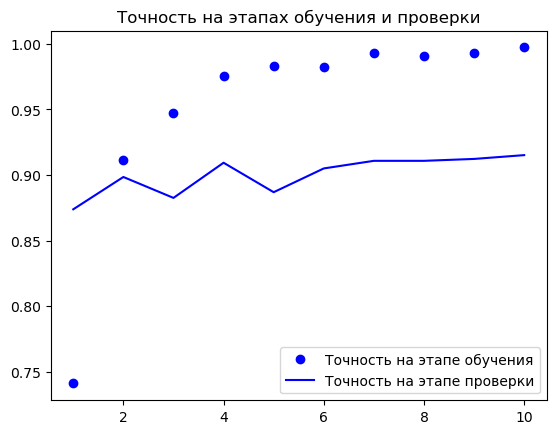

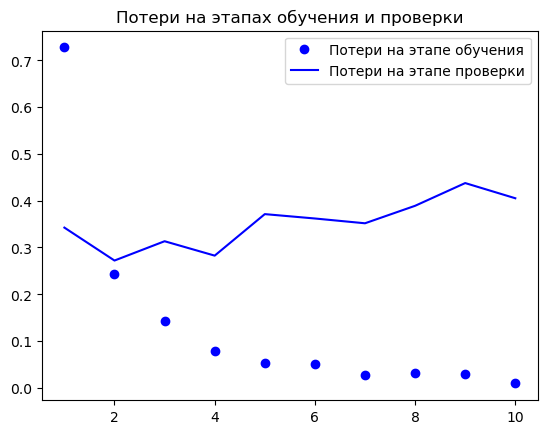

216/216 [==============================] - 23s 106ms/step - loss: 0.1790 - accuracy: 0.9396
Test accuracy: 0.940


In [4]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_accuracy, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.legend()
plt.show()

test_model = keras.models.load_model('natural_images.h5')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [5]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(8, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint('natural_images2.h5',
                                  save_best_only=True)
]
history = model.fit(train_dataset,
                   epochs=15,
                   validation_data=validation_dataset,
                   callbacks=callbacks)

Epoch 1/15
173/173 [==============================] - 108s 622ms/step - loss: 1.4235 - accuracy: 0.5080 - val_loss: 1.5662 - val_accuracy: 0.5547
Epoch 2/15
173/173 [==============================] - 107s 618ms/step - loss: 0.5741 - accuracy: 0.7984 - val_loss: 1.5223 - val_accuracy: 0.4445
Epoch 3/15
173/173 [==============================] - 105s 604ms/step - loss: 0.3678 - accuracy: 0.8594 - val_loss: 1.0896 - val_accuracy: 0.6070
Epoch 4/15
173/173 [==============================] - 106s 610ms/step - loss: 0.2778 - accuracy: 0.8964 - val_loss: 1.0259 - val_accuracy: 0.6113
Epoch 5/15
173/173 [==============================] - 106s 611ms/step - loss: 0.2229 - accuracy: 0.9123 - val_loss: 1.0176 - val_accuracy: 0.6309
Epoch 6/15
173/173 [==============================] - 107s 615ms/step - loss: 0.1996 - accuracy: 0.9225 - val_loss: 1.0139 - val_accuracy: 0.6461
Epoch 7/15
173/173 [==============================] - 107s 615ms/step - loss: 0.1755 - accuracy: 0.9326 - val_loss: 0.7055 -

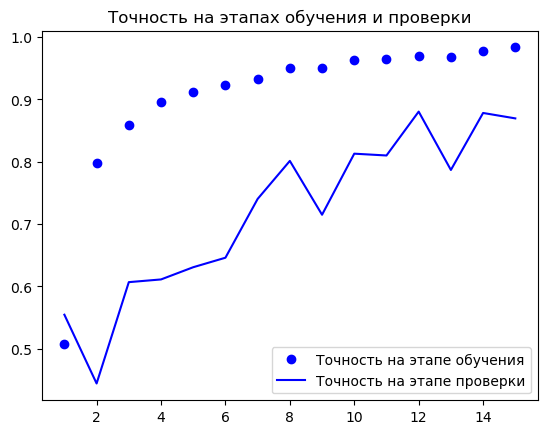

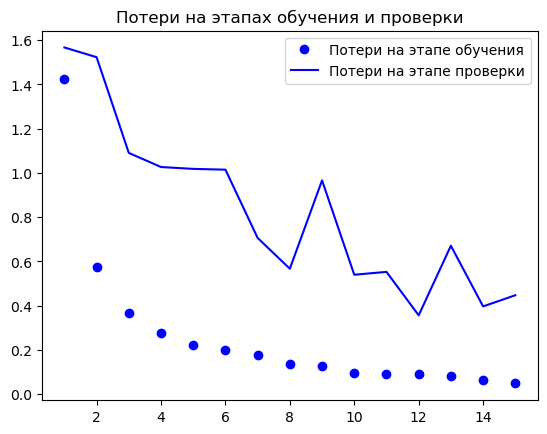

216/216 [==============================] - 25s 115ms/step - loss: 0.1880 - accuracy: 0.9269
Test accuracy: 0.927


In [6]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_accuracy, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.legend()
plt.show()

test_model = keras.models.load_model('natural_images2.h5')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [7]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(8, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint('natural_images3.h5',
                                  save_best_only=True)
]
history = model.fit(train_dataset,
                   epochs=20,
                   validation_data=validation_dataset,
                   callbacks=callbacks)

Epoch 1/20
173/173 [==============================] - 107s 613ms/step - loss: 1.3470 - accuracy: 0.5181 - val_loss: 1.2692 - val_accuracy: 0.6642
Epoch 2/20
173/173 [==============================] - 105s 609ms/step - loss: 0.5424 - accuracy: 0.8014 - val_loss: 0.7863 - val_accuracy: 0.7368
Epoch 3/20
173/173 [==============================] - 106s 611ms/step - loss: 0.3778 - accuracy: 0.8589 - val_loss: 0.7829 - val_accuracy: 0.6882
Epoch 4/20
173/173 [==============================] - 107s 617ms/step - loss: 0.2895 - accuracy: 0.8891 - val_loss: 0.6782 - val_accuracy: 0.7346
Epoch 5/20
173/173 [==============================] - 106s 614ms/step - loss: 0.2520 - accuracy: 0.9031 - val_loss: 0.5685 - val_accuracy: 0.7745
Epoch 6/20
173/173 [==============================] - 106s 614ms/step - loss: 0.2288 - accuracy: 0.9094 - val_loss: 0.5909 - val_accuracy: 0.7723
Epoch 7/20
173/173 [==============================] - 107s 616ms/step - loss: 0.1869 - accuracy: 0.9303 - val_loss: 0.5930 -

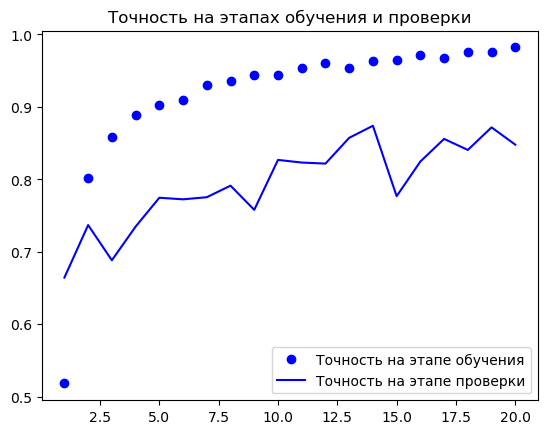

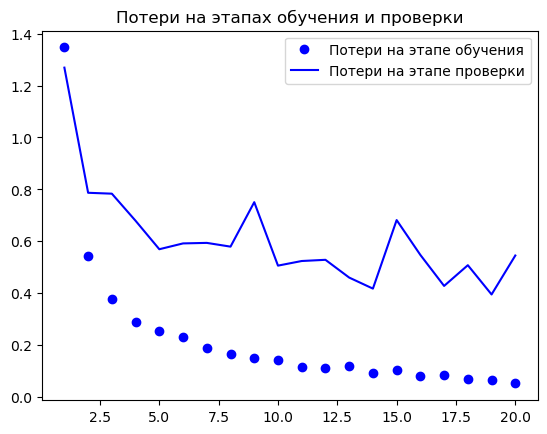

216/216 [==============================] - 24s 113ms/step - loss: 0.1667 - accuracy: 0.9436
Test accuracy: 0.944


In [10]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_accuracy, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.legend()
plt.show()

test_model = keras.models.load_model('natural_images3.h5')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [9]:
dump(model, 'keras-model.joblib')

['keras-model.joblib']